## 1. Importing the modules


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Loading the data

In [7]:
df = pd.read_excel('data.xlsx', skiprows=0)

In [8]:
df

,Unnamed: 0,date,electricity_price (PLN/MWh),energy_demand (MW),energy_from_wind_sources (MW),is_holiday,code_of_the_day,electricity_price (PLN/MWh) lag24,electricity_price (PLN/MWh) lag48,electricity_price (PLN/MWh) lag72,...,energy_from_wind_sources (MW) lag168,energy_from_wind_sources (MW) lag336,energy_demand (MW) lag24,energy_demand (MW) lag48,energy_demand (MW) lag72,energy_demand (MW) lag96,energy_demand (MW) lag120,energy_demand (MW) lag144,energy_demand (MW) lag168,energy_demand (MW) lag336
0,0,2018-01-01 01:00:00,117.00,14586,3938,1,0,98.00,121.03,121.22,...,5042,130,15048,15984,16093,16198,14063,13451,13482,16716
1,1,2018-01-01 02:00:00,113.59,14453,3876,1,0,82.00,121.03,120.00,...,5091,128,14295,15325,15383,15378,13525,12903,12995,16189
2,2,2018-01-01 03:00:00,97.00,13692,3897,1,0,76.14,121.03,119.60,...,4999,119,14110,14971,15229,15136,13204,12755,12587,16108
3,3,2018-01-01 04:00:00,89.00,13329,4091,1,0,74.70,121.03,119.60,...,4884,116,13961,14920,15160,15055,13243,12638,12276,16250
4,4,2018-01-01 05:00:00,75.00,13168,4197,1,0,73.78,121.03,121.22,...,4673,110,13910,15013,15372,15158,13319,12787,12228,16819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26202,26202,2020-12-27 19:00:00,198.81,18254,5645,1,1,204.91,238.56,180.00,...,2653,197,17184,16568,16697,24065,24401,24650,20594,20903
26203,26203,2020-12-27 20:00:00,195.00,18242,5669,1,1,212.91,226.30,155.10,...,2611,235,17339,16608,16535,23724,24123,24361,20472,20810
26204,26204,2020-12-27 21:00:00,186.03,18021,5518,1,1,212.91,220.44,130.00,...,2435,250,17077,16381,16286,23029,23324,23697,20087,20090
26205,26205,2020-12-27 22:00:00,174.75,17370,5625,1,1,207.89,214.67,122.77,...,2266,252,16479,16050,16124,21560,21806,22177,19237,19173


## 3. Preparing data for analysis

### 3.1. Data preprocessing

In [11]:
del df['Unnamed: 0']

KeyError: 'Unnamed: 0'

In [12]:
df['day_of_the week'] = pd.to_datetime(df['date']).dt.dayofweek
df['date_normalize'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

def label_day_of_the_week(row):
    if row['day_of_the week'] == 0:
        return 'Monday'
    if row['day_of_the week'] == 1:
        return 'Tuesday'
    if row['day_of_the week'] == 2:
        return 'Wednesday'
    if row['day_of_the week'] == 3:
        return 'Thursday'
    if row['day_of_the week'] == 4:
        return 'Friday'
    if row['day_of_the week'] == 5:
        return 'Saturday'
    if row['day_of_the week'] == 6:
        return 'Sunday'


def is_holiday(row):
    if row['day_of_the week'] == 'Sunday':
        return 1
    else:
        return 0
df['day_of_the week'] = df.apply(lambda row: label_day_of_the_week(row), axis=1)
df['is_holiday'] = df.apply(lambda row: is_holiday(row), axis=1)


def polish_label_holidays(row):
    if row['is_holiday'] == 0 and (row['date_normalize']=='2018-01-01' or row['date_normalize']=='2018-01-06'
    or row['date_normalize']=='2018-04-01' or row['date_normalize']=='2018-04-02' or row['date_normalize']=='2018-05-01'
    or row['date_normalize']=='2018-05-03' or row['date_normalize']=='2018-05-31' or row['date_normalize']=='2018-08-15'
    or row['date_normalize']=='2018-11-01' or row['date_normalize']=='2018-11-11' or row['date_normalize']=='2018-12-25'
    or row['date_normalize']=='2018-12-26' or row['date_normalize']=='2019-01-01' or row['date_normalize']=='2019-01-06'
    or row['date_normalize']=='2019-04-21' or row['date_normalize']=='2019-04-22' or row['date_normalize']=='2019-05-01'
    or row['date_normalize']=='2019-05-03' or row['date_normalize']=='2019-06-09' or row['date_normalize']=='2019-06-20'
    or row['date_normalize']=='2019-08-15' or row['date_normalize']=='2019-11-01' or row['date_normalize']=='2019-11-11'
    or row['date_normalize']=='2019-12-25' or row['date_normalize']=='2019-12-26' or row['date_normalize']=='2020-01-01'
    or row['date_normalize']=='2020-01-06' or row['date_normalize']=='2020-04-12' or row['date_normalize']=='2020-04-13'
    or row['date_normalize']=='2020-05-01' or row['date_normalize']=='2020-05-03' or row['date_normalize']=='2020-06-11'
    or row['date_normalize']=='2020-08-15' or row['date_normalize']=='2020-11-11' or row['date_normalize']=='2020-12-25'
    or row['date_normalize']=='2020-12-26'):
        return 1

    if row['is_holiday'] == 1:
        return 1
    else:
        return 0

#returns code of the day  (for hours from 6 am to 11 pm - 1, for other hours - 0)
def label_hour(row):
    if row['hour'] >= 6 and row['hour'] <= 22:
        return 1
    else:
        return 0

df['is_holiday'] = df.apply(lambda row: polish_label_holidays(row), axis=1)
df['hour'] = df.date.dt.hour
df['code_of_the_day'] = df.apply(lambda row: label_hour(row), axis=1)

#del df['hour']

del df['day_of_the week']
del df['CO2_emission_allowances (PLN)']

KeyError: 'CO2_emission_allowances (PLN)'

In [ ]:
df

### 3.2. Generate lags

In [13]:
n_lags = 336

def generate_time_lags(df, n_lags):
    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"electricity_price (PLN/MWh) lag{n}"] = df_n["electricity_price (PLN/MWh)"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n


def generation_domestic_electricity_demand_lags(df, n_lags):

    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"energy_demand (MW) lag{n}"] = df_n["energy_demand (MW)"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n



def generation_of_energy_from_wind_sources_lags(df, n_lags):

    df_n = df.copy()
    for n in range(1, n_lags + 1):
        df_n[f"energy_from_wind_sources (MW) lag{n}"] = df_n["energy_from_wind_sources (MW)"].shift(n)
    df_n = df_n.iloc[n_lags:]
    return df_n

df = generate_time_lags(df, n_lags)
df = generation_of_energy_from_wind_sources_lags(df, n_lags)
df = generation_domestic_electricity_demand_lags(df, n_lags)

for n in range(1,337):
    if n == 24 or n== 48 or n== 72 or n== 96 or n== 120 or n== 144 or n== 168 or n== 336:
        continue
    else:
        del df[f'electricity_price (PLN/MWh) lag{n}']
        del df[f'energy_demand (MW) lag{n}']
        del df[f'energy_from_wind_sources (MW) lag{n}']



<ipython-input-13-261fa5be736b>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_n[f"electricity_price (PLN/MWh) lag{n}"] = df_n["electricity_price (PLN/MWh)"].shift(n)
<ipython-input-13-261fa5be736b>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_n[f"electricity_price (PLN/MWh) lag{n}"] = df_n["electricity_price (PLN/MWh)"].shift(n)
<ipython-input-13-261fa5be736b>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

In [14]:
df

,date,electricity_price (PLN/MWh),energy_demand (MW),energy_from_wind_sources (MW),is_holiday,code_of_the_day,electricity_price (PLN/MWh) lag24,electricity_price (PLN/MWh) lag48,electricity_price (PLN/MWh) lag72,electricity_price (PLN/MWh) lag96,...,energy_demand (MW) lag24,energy_demand (MW) lag48,energy_demand (MW) lag72,energy_demand (MW) lag96,energy_demand (MW) lag120,energy_demand (MW) lag144,energy_demand (MW) lag168,energy_demand (MW) lag336,date_normalize,hour
1008,2018-02-12 01:00:00,125.07,16318,1830,0,0,124.63,146.00,139.64,147.93,...,16933.0,18430.0,18941.0,18885.0,18832.0,18655.0,16398.0,15772.0,2018-02-12,1
1009,2018-02-12 02:00:00,124.68,15903,1726,0,0,124.16,140.92,136.10,144.00,...,16277.0,17902.0,18291.0,18291.0,18266.0,18084.0,16034.0,15271.0,2018-02-12,2
1010,2018-02-12 03:00:00,124.54,15794,1635,0,0,124.73,140.92,134.00,140.84,...,15826.0,17669.0,18010.0,18075.0,18030.0,17866.0,15881.0,15261.0,2018-02-12,3
1011,2018-02-12 04:00:00,124.54,15948,1555,0,0,124.47,140.64,135.00,140.75,...,15674.0,17525.0,18034.0,18096.0,18017.0,17935.0,15946.0,15327.0,2018-02-12,4
1012,2018-02-12 05:00:00,125.38,16404,1492,0,0,124.49,139.60,136.10,140.84,...,15666.0,17673.0,18381.0,18366.0,18455.0,18269.0,16453.0,15814.0,2018-02-12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26202,2020-12-27 19:00:00,198.81,18254,5645,1,1,204.91,238.56,180.00,330.20,...,17184.0,16568.0,16697.0,24065.0,24401.0,24650.0,20594.0,20903.0,2020-12-27,19
26203,2020-12-27 20:00:00,195.00,18242,5669,1,1,212.91,226.30,155.10,314.38,...,17339.0,16608.0,16535.0,23724.0,24123.0,24361.0,20472.0,20810.0,2020-12-27,20
26204,2020-12-27 21:00:00,186.03,18021,5518,1,1,212.91,220.44,130.00,248.57,...,17077.0,16381.0,16286.0,23029.0,23324.0,23697.0,20087.0,20090.0,2020-12-27,21
26205,2020-12-27 22:00:00,174.75,17370,5625,1,1,207.89,214.67,122.77,229.32,...,16479.0,16050.0,16124.0,21560.0,21806.0,22177.0,19237.0,19173.0,2020-12-27,22


In [15]:
df = df[df['date']>='2018-01-01 01:00:00']

In [16]:
df = df.reset_index(drop=False)
del df['index']

In [17]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

In [18]:
rows_with_nan

[]

In [19]:
df2018 = df[df['date']<'2019-01-01 00:00:00'].reset_index(drop=True)
df2019 = df[df['date']<'2020-01-01 00:00:00'].reset_index(drop=True)
df2020 = df[df['date']>='2020-01-01 00:00:00'].reset_index(drop=True)


### 3.3. Checking outliers

In [20]:
df2019

,date,electricity_price (PLN/MWh),energy_demand (MW),energy_from_wind_sources (MW),is_holiday,code_of_the_day,electricity_price (PLN/MWh) lag24,electricity_price (PLN/MWh) lag48,electricity_price (PLN/MWh) lag72,electricity_price (PLN/MWh) lag96,...,energy_demand (MW) lag24,energy_demand (MW) lag48,energy_demand (MW) lag72,energy_demand (MW) lag96,energy_demand (MW) lag120,energy_demand (MW) lag144,energy_demand (MW) lag168,energy_demand (MW) lag336,date_normalize,hour
0,2018-02-12 01:00:00,125.07,16318,1830,0,0,124.63,146.00,139.64,147.93,...,16933.0,18430.0,18941.0,18885.0,18832.0,18655.0,16398.0,15772.0,2018-02-12,1
1,2018-02-12 02:00:00,124.68,15903,1726,0,0,124.16,140.92,136.10,144.00,...,16277.0,17902.0,18291.0,18291.0,18266.0,18084.0,16034.0,15271.0,2018-02-12,2
2,2018-02-12 03:00:00,124.54,15794,1635,0,0,124.73,140.92,134.00,140.84,...,15826.0,17669.0,18010.0,18075.0,18030.0,17866.0,15881.0,15261.0,2018-02-12,3
3,2018-02-12 04:00:00,124.54,15948,1555,0,0,124.47,140.64,135.00,140.75,...,15674.0,17525.0,18034.0,18096.0,18017.0,17935.0,15946.0,15327.0,2018-02-12,4
4,2018-02-12 05:00:00,125.38,16404,1492,0,0,124.49,139.60,136.10,140.84,...,15666.0,17673.0,18381.0,18366.0,18455.0,18269.0,16453.0,15814.0,2018-02-12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16506,2019-12-31 19:00:00,185.00,18936,3826,0,1,171.63,199.51,221.93,208.59,...,21250.0,19197.0,20245.0,20514.0,16412.0,15833.0,16340.0,24116.0,2019-12-31,19
16507,2019-12-31 20:00:00,172.28,18054,3827,0,1,171.74,202.68,222.94,207.12,...,20992.0,19054.0,19956.0,20219.0,16469.0,15943.0,15859.0,23812.0,2019-12-31,20
16508,2019-12-31 21:00:00,157.63,16938,3674,0,1,160.71,199.51,209.73,200.59,...,20586.0,18475.0,19496.0,19663.0,16326.0,15779.0,15770.0,22953.0,2019-12-31,21
16509,2019-12-31 22:00:00,149.99,16249,3474,0,1,135.98,189.16,192.00,164.86,...,19339.0,18108.0,18387.0,18627.0,15875.0,15348.0,15711.0,21635.0,2019-12-31,22


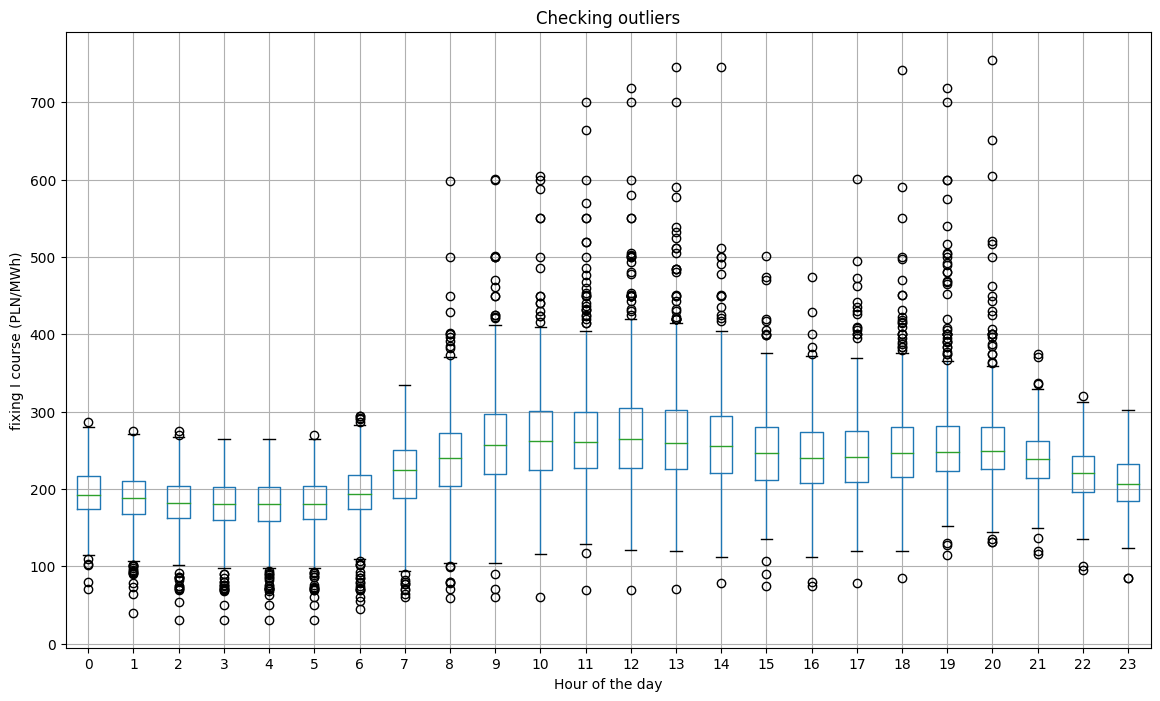

In [21]:
# box-plot for checking outliers in particular hours for 2019
outpoints_hourly_2019 = df2019.pivot_table(index='date_normalize',
                     columns=df2019['hour'],
                     values='electricity_price (PLN/MWh)',
                     aggfunc='mean').boxplot(figsize=(14,8)).set(title = "Checking outliers", xlabel = "Hour of the day", ylabel = "fixing I course (PLN/MWh)")

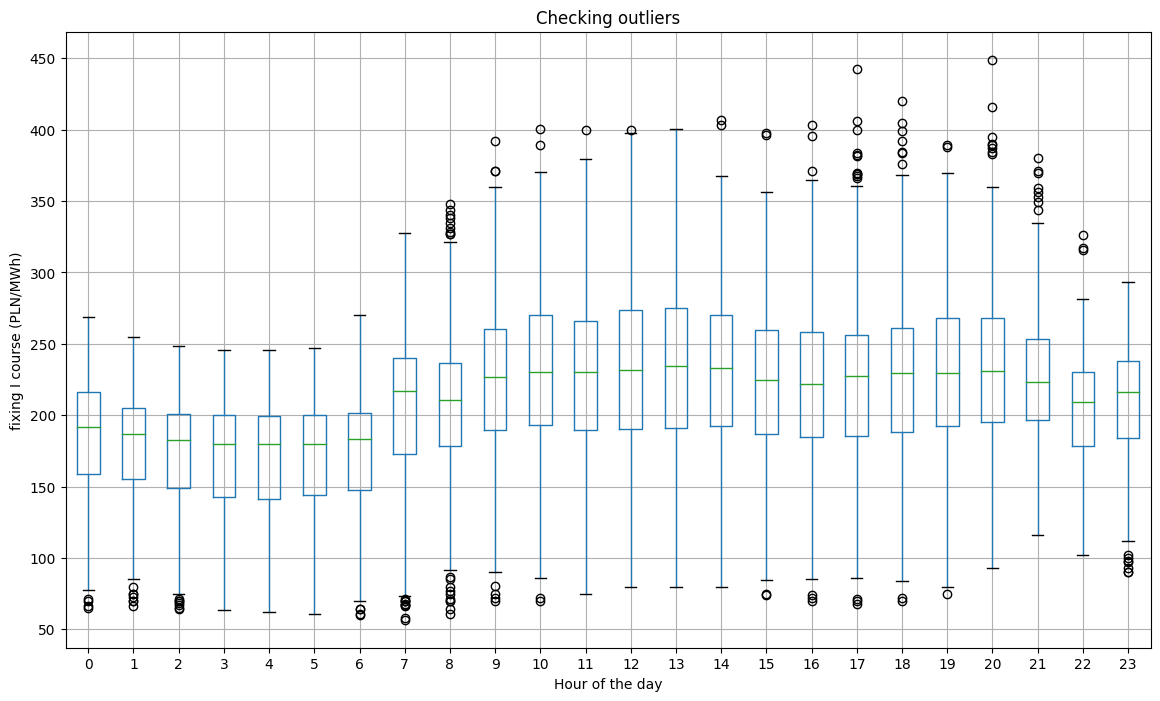

In [22]:
# box-plot for checking outliers in particular hours for 2020
outpoints_hourly_2020 = df2020.pivot_table(index='date_normalize',
                     columns=df2020['hour'],
                     values='electricity_price (PLN/MWh)',
                     aggfunc='mean').boxplot(figsize=(14,8)).set(title = "Checking outliers", xlabel = "Hour of the day", ylabel = "fixing I course (PLN/MWh)")

In [23]:
#del df['date_normalize']
del df['hour']

In [24]:
# Exporting the dataset for training
#df.to_excel("data.xlsx")

## 3. Analysis of the time series of electricity prices at the Polish Power Exchange Day Ahead Market

<ipython-input-33-db9d313e9ec3>:11: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(120,270, 30)


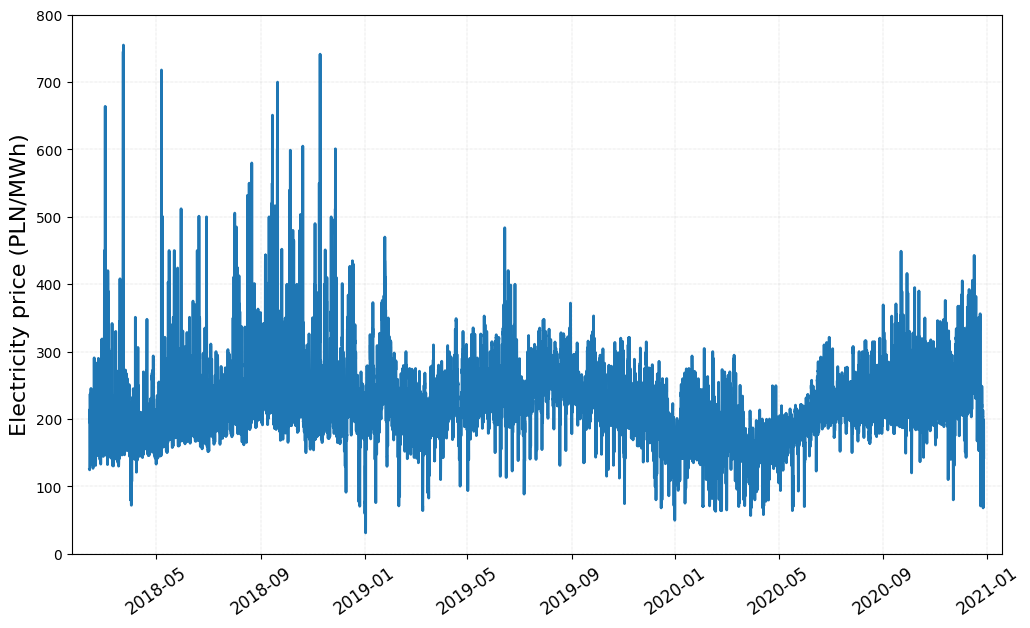

In [33]:
plt.rcParams["figure.facecolor"] = "w"
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(df['date'], df['electricity_price (PLN/MWh)'], label = 'line 1',
        linewidth=2.0)


my_xticks = np.array(df['date_normalize'])
plt.ylabel("Electricity price (PLN/MWh)", fontsize=16)
plt.margins(0.02)
plt.ylim(120,270, 30)
plt.yticks(np.arange(0, 810, 100), fontsize=10)
plt.xticks(fontsize=12, rotation = 35)
plt.grid(color='gray', linestyle=':', linewidth=0.35, alpha=0.6, axis='both')
plt.show()

In [34]:
df_daily = df.groupby(['date_normalize']).agg({'electricity_price (PLN/MWh)':np.mean}).reset_index()

<ipython-input-34-2b97df03283c>:1: FutureWarning: The provided callable <function mean at 0x79f58fcb7d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_daily = df.groupby(['date_normalize']).agg({'electricity_price (PLN/MWh)':np.mean}).reset_index()


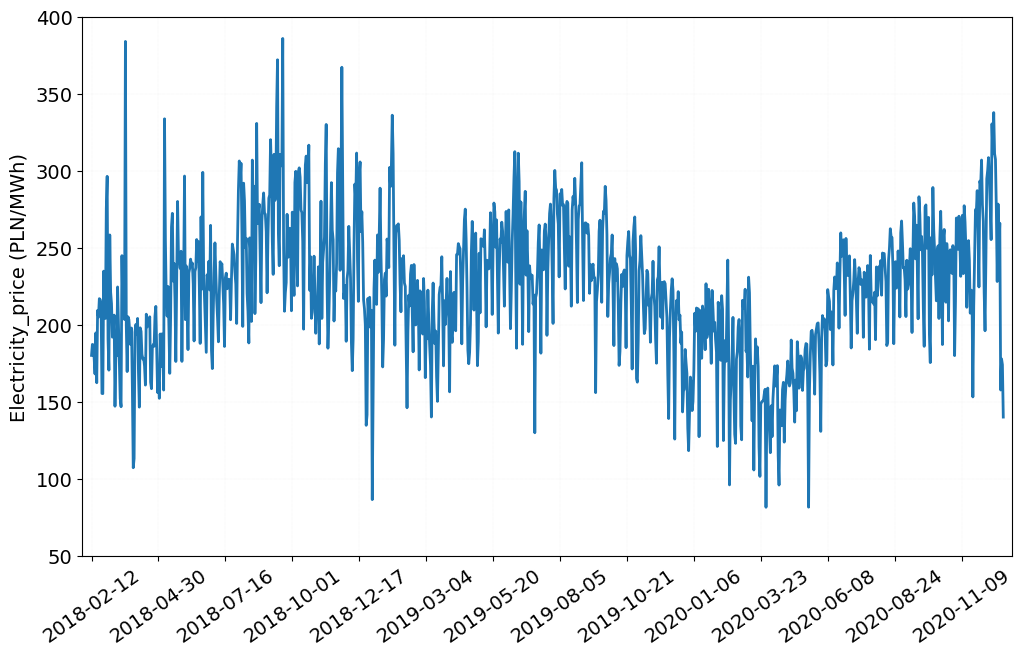

In [35]:
fig, ax = plt.subplots(figsize=(12,7))

plt.plot(df_daily['date_normalize'], df_daily['electricity_price (PLN/MWh)'], label = 'line 1', linewidth=2.0)
plt.ylabel("Electricity_price (PLN/MWh)", fontsize=14)
plt.margins(0.01)

plt.yticks(np.arange(50, 410, 50), fontsize=14)
plt.grid(color='gray', linestyle=':', linewidth=0.35, alpha=0.2, axis='both')
ax.set_xticks(df_daily['date_normalize'].loc[::77])
ax.set_xticklabels([label for label in df_daily['date_normalize'].loc[::77]],rotation = 35, fontsize=14)
#plt.xticks(rotation=60)
plt.savefig('fig1.png', dpi=800)
plt.show()

In [36]:
df

,date,electricity_price (PLN/MWh),energy_demand (MW),energy_from_wind_sources (MW),is_holiday,code_of_the_day,electricity_price (PLN/MWh) lag24,electricity_price (PLN/MWh) lag48,electricity_price (PLN/MWh) lag72,electricity_price (PLN/MWh) lag96,...,energy_from_wind_sources (MW) lag336,energy_demand (MW) lag24,energy_demand (MW) lag48,energy_demand (MW) lag72,energy_demand (MW) lag96,energy_demand (MW) lag120,energy_demand (MW) lag144,energy_demand (MW) lag168,energy_demand (MW) lag336,date_normalize
0,2018-02-12 01:00:00,125.07,16318,1830,0,0,124.63,146.00,139.64,147.93,...,4514.0,16933.0,18430.0,18941.0,18885.0,18832.0,18655.0,16398.0,15772.0,2018-02-12
1,2018-02-12 02:00:00,124.68,15903,1726,0,0,124.16,140.92,136.10,144.00,...,4389.0,16277.0,17902.0,18291.0,18291.0,18266.0,18084.0,16034.0,15271.0,2018-02-12
2,2018-02-12 03:00:00,124.54,15794,1635,0,0,124.73,140.92,134.00,140.84,...,4204.0,15826.0,17669.0,18010.0,18075.0,18030.0,17866.0,15881.0,15261.0,2018-02-12
3,2018-02-12 04:00:00,124.54,15948,1555,0,0,124.47,140.64,135.00,140.75,...,4013.0,15674.0,17525.0,18034.0,18096.0,18017.0,17935.0,15946.0,15327.0,2018-02-12
4,2018-02-12 05:00:00,125.38,16404,1492,0,0,124.49,139.60,136.10,140.84,...,3911.0,15666.0,17673.0,18381.0,18366.0,18455.0,18269.0,16453.0,15814.0,2018-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25194,2020-12-27 19:00:00,198.81,18254,5645,1,1,204.91,238.56,180.00,330.20,...,197.0,17184.0,16568.0,16697.0,24065.0,24401.0,24650.0,20594.0,20903.0,2020-12-27
25195,2020-12-27 20:00:00,195.00,18242,5669,1,1,212.91,226.30,155.10,314.38,...,235.0,17339.0,16608.0,16535.0,23724.0,24123.0,24361.0,20472.0,20810.0,2020-12-27
25196,2020-12-27 21:00:00,186.03,18021,5518,1,1,212.91,220.44,130.00,248.57,...,250.0,17077.0,16381.0,16286.0,23029.0,23324.0,23697.0,20087.0,20090.0,2020-12-27
25197,2020-12-27 22:00:00,174.75,17370,5625,1,1,207.89,214.67,122.77,229.32,...,252.0,16479.0,16050.0,16124.0,21560.0,21806.0,22177.0,19237.0,19173.0,2020-12-27


In [37]:
import statistics

smallest_hourly_fixing_price_2019 = min(df2019['electricity_price (PLN/MWh)'])
print('The lowest hourly electricity price in 2019: ', smallest_hourly_fixing_price_2019, "PLN/MWh")
biggest_hourly_fixing_price_2019 = max(df2019['electricity_price (PLN/MWh)'])
print('The largest hourly electricity price in 2019: ', biggest_hourly_fixing_price_2019, "PLN/MWh")
average_hourly_fixing_price_2019 = round(statistics.mean(df2019['electricity_price (PLN/MWh)']))
print('Average hourly electricity price in 2019: ', average_hourly_fixing_price_2019, "PLN/MWh")

The lowest hourly electricity price in 2019:  31.0 PLN/MWh
The largest hourly electricity price in 2019:  755.0 PLN/MWh
Average hourly electricity price in 2019:  231 PLN/MWh


In [38]:
smallest_hourly_fixing_price_2020 = min(df2020['electricity_price (PLN/MWh)'])
print('The lowest hourly electricity price in 2020: ', smallest_hourly_fixing_price_2020, "PLN/MWh")
biggest_hourly_fixing_price_2020 = max(df2020['electricity_price (PLN/MWh)'])
print('The largest hourly electricity price in 2020: ', biggest_hourly_fixing_price_2020, "PLN/MWh")
average_hourly_fixing_price_2020 = round(statistics.mean(df2020['electricity_price (PLN/MWh)']))
print('Average hourly electricity price in 2020: ', average_hourly_fixing_price_2020, "PLN/MWh")

The lowest hourly electricity price in 2020:  56.73 PLN/MWh
The largest hourly electricity price in 2020:  449.0 PLN/MWh
Average hourly electricity price in 2020:  209 PLN/MWh


In [39]:
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm

def tsdisplay(y, figsize = (26, 18), title = "", lags = 168):
    tmp_data = pd.Series(y)
    fig = plt.figure(figsize = figsize)

    #Plot the PACF:
    plt.rc("figure", figsize=(13,5))
    _ = sm.graphics.tsa.plot_acf(tmp_data, lags = 168, zero = True)
    _ = plt.xticks(np.arange(0,  lags+1, 8))
    plt.title("")
    plt.xticks(rotation=30)
    plt.grid(color='gray', linestyle=':', linewidth=0.35, alpha=0.2, axis='both')
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=13.3)
    plt.xlabel("Lag time (Hour)", fontsize=11)
    plt.savefig('fig_2.png', dpi=800)
    plt.show()

<Figure size 2600x1800 with 0 Axes>

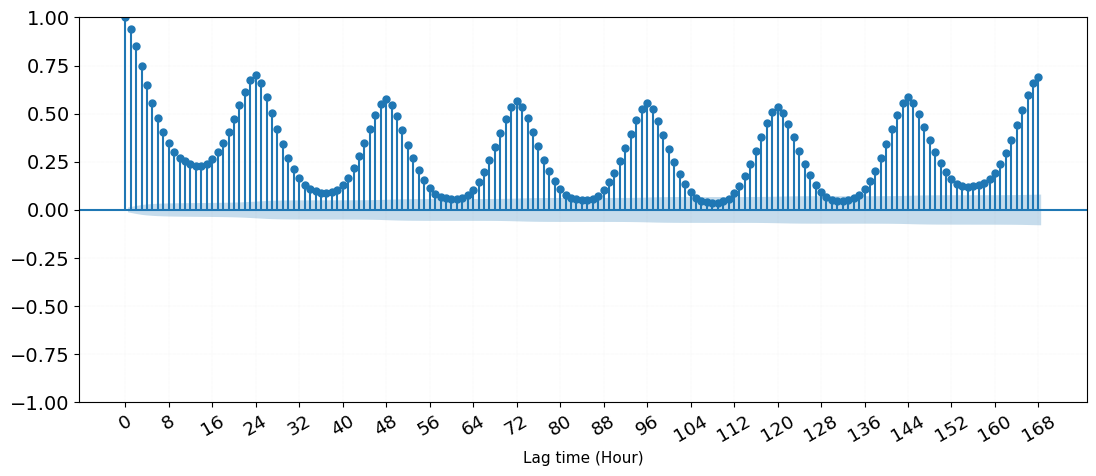

In [40]:
tsdisplay(df['electricity_price (PLN/MWh)'])